In [5]:
pip install sktime



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 64.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 11.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install prophet 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 48.2 MB/s eta 0:00:0000:010:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 695.7/695.7 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 56.6 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 41.6 MB/s eta 0:00:00:00:01
  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=731999 sha256=ddc545587777cf86274f530280fb8b62e06671148219aa0c1fbcf70253bc7a3d
  Stored in directory: /home/codespace/.cache/pip/wheels/d6/67/78/aa2e8d108639dd23a5e9e72a4fc88bb44f5541894382712f48
Successfully built pymeeus

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To 

In [7]:
pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 45.0 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 10.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
from sktime.utils.plotting import plot_series
import sys
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")
import src.utility.plot_settings

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

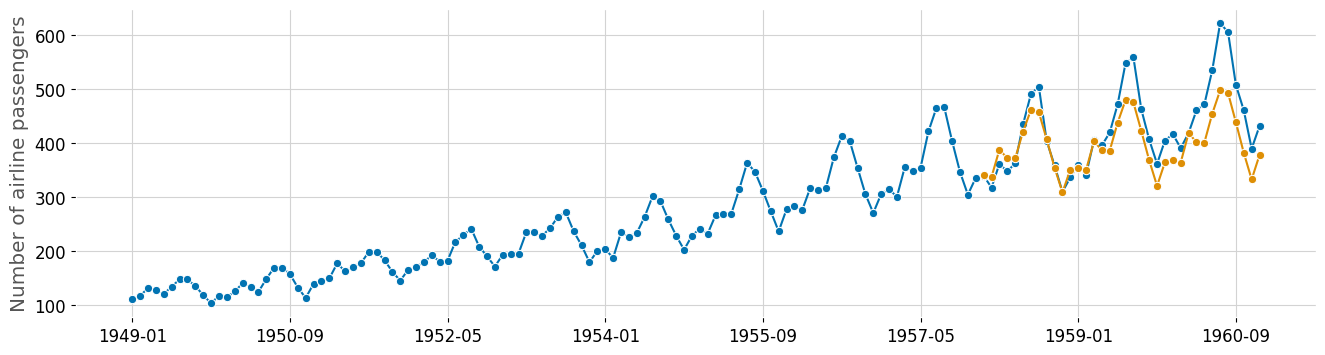

In [2]:

# https://www.sktime.org/en/stable/get_started.html

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=12)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mean_absolute_percentage_error(y_test, y_pred)
plot_series(y, y_pred)

In [6]:
# https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset
traffic = pd.read_csv("data/raw/traffic.csv", parse_dates=[0], index_col=[0])
traffic = traffic.pivot(columns="Junction", values="Vehicles")
traffic

Junction,1,2,3,4
DateTime,,,,
2015-11-01 00:00:00,15.0,6.0,9.0,NaN
2015-11-01 01:00:00,13.0,6.0,7.0,NaN
2015-11-01 02:00:00,10.0,5.0,5.0,NaN
2015-11-01 03:00:00,7.0,6.0,1.0,NaN
2015-11-01 04:00:00,9.0,7.0,2.0,NaN
...,...,...,...,...
2017-06-30 19:00:00,105.0,34.0,33.0,11.0
2017-06-30 20:00:00,96.0,35.0,31.0,30.0
2017-06-30 21:00:00,90.0,31.0,28.0,16.0


In [7]:
def sktime_forecast(dataset, horizon, forecaster, validation=False, confidence=0.9, frequency="D"):
    """Loop over a time series dataframe, train an sktime forecasting model, and visualize the results.

    Args:
        dataset (pd.DataFrame): Input time series DataFrame with datetime index
        horizon (int): Forecast horizon
        forecaster (sktime.forecasting): Configured forecaster
        validation (bool, optional): . Defaults to False.
        confidence (float, optional): Confidence level. Defaults to 0.9.
        frequency (str, optional): . Defaults to "D".
    """
    
    # Adjust frequency
    forecast_df = dataset.resample(rule=frequency).sum()

    # Interpolate missing periods (if any)
    forecast_df = forecast_df.interpolate(method="time")

    for col in dataset.columns:

        # Use train/test split to validate forecaster
        if validation:
            df = forecast_df[col]

            y_train = df[:-horizon]
            y_test = df.tail(horizon)

            forecaster.fit(y_train)
            fh = ForecastingHorizon(y_test.index, is_relative=False)
            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            y_true = df.tail(horizon)

            mae = mean_absolute_error(y_true, y_pred)

        # Make predictions beyond the dataset
        if not validation:
            df = forecast_df[col].dropna()
            forecaster.fit(df)

            last_date = df.index.max()
            fh = ForecastingHorizon(
                pd.date_range(str(last_date), periods=horizon, freq=frequency),
                is_relative=False,
            )

            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            mae = np.nan

        # Visualize results
        plt.plot(
            df.tail(horizon * 3),
            label="Actual",
            color="black",
        )
        plt.gca().fill_between(
            ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
        )
        plt.plot(y_pred, label="Predicted")
        # plt.title(
        #     f"{horizon} day forecast for {col} (mae: {round(mae, 2)}, confidence: {confidence*100}%)"
        # )
        plt.ylim(bottom=0)
        # plt.legend()
        plt.grid(False)
        plt.show()

17:45:33 - cmdstanpy - INFO - Chain [1] start processing
17:45:33 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/python/3.10.8/lib/python3.10/site-packages/sktime/forecasting/base/_base.py:683: UserWarning: In 0.22.0, predict_interval return default column level 0 name will change for univariate probabilistic interval forecasts from 'Coverage' to variable name. The old behaviour can be retained by setting the legacy_interface argument to True, until 0.23.0 when the legacy_interface argument will be removed.
  warn(


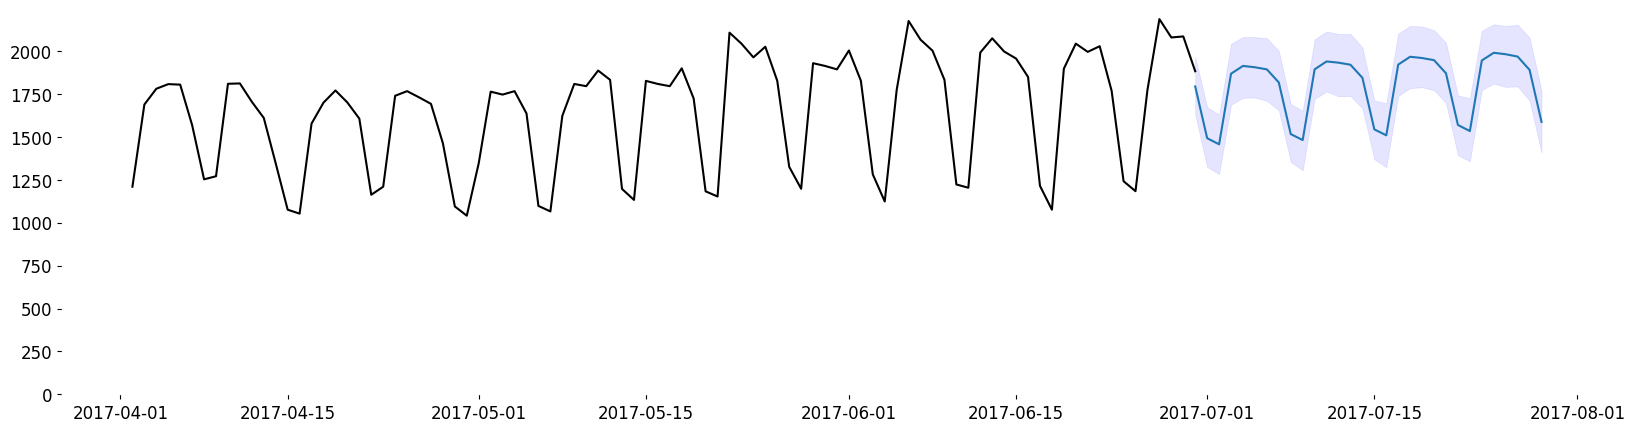

17:45:34 - cmdstanpy - INFO - Chain [1] start processing
17:45:34 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/python/3.10.8/lib/python3.10/site-packages/sktime/forecasting/base/_base.py:683: UserWarning: In 0.22.0, predict_interval return default column level 0 name will change for univariate probabilistic interval forecasts from 'Coverage' to variable name. The old behaviour can be retained by setting the legacy_interface argument to True, until 0.23.0 when the legacy_interface argument will be removed.
  warn(


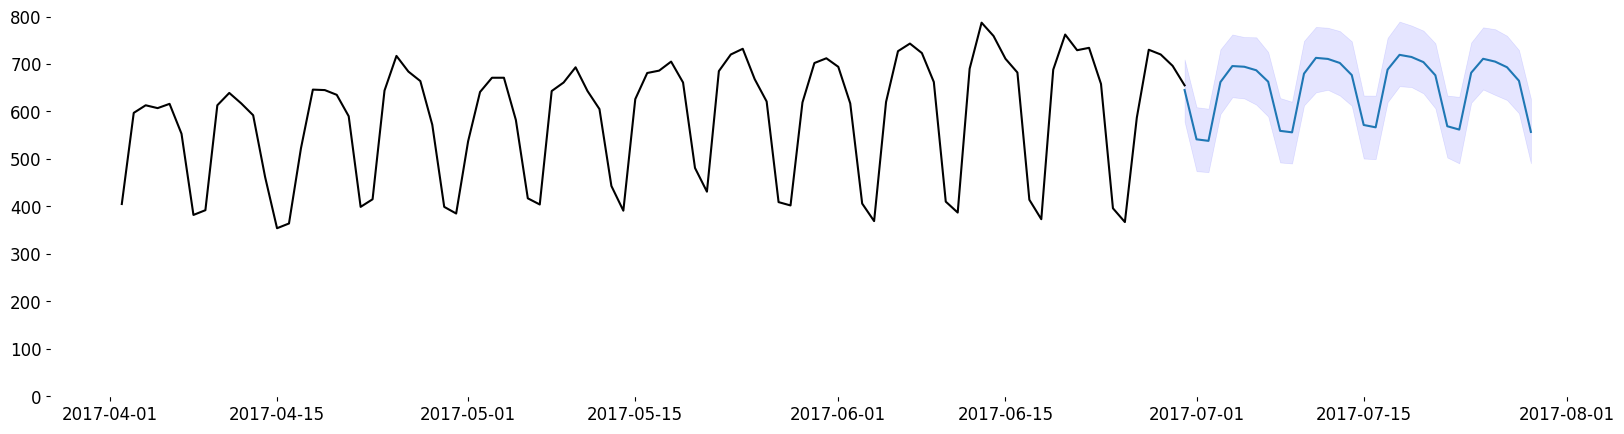

17:45:34 - cmdstanpy - INFO - Chain [1] start processing
17:45:34 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/python/3.10.8/lib/python3.10/site-packages/sktime/forecasting/base/_base.py:683: UserWarning: In 0.22.0, predict_interval return default column level 0 name will change for univariate probabilistic interval forecasts from 'Coverage' to variable name. The old behaviour can be retained by setting the legacy_interface argument to True, until 0.23.0 when the legacy_interface argument will be removed.
  warn(


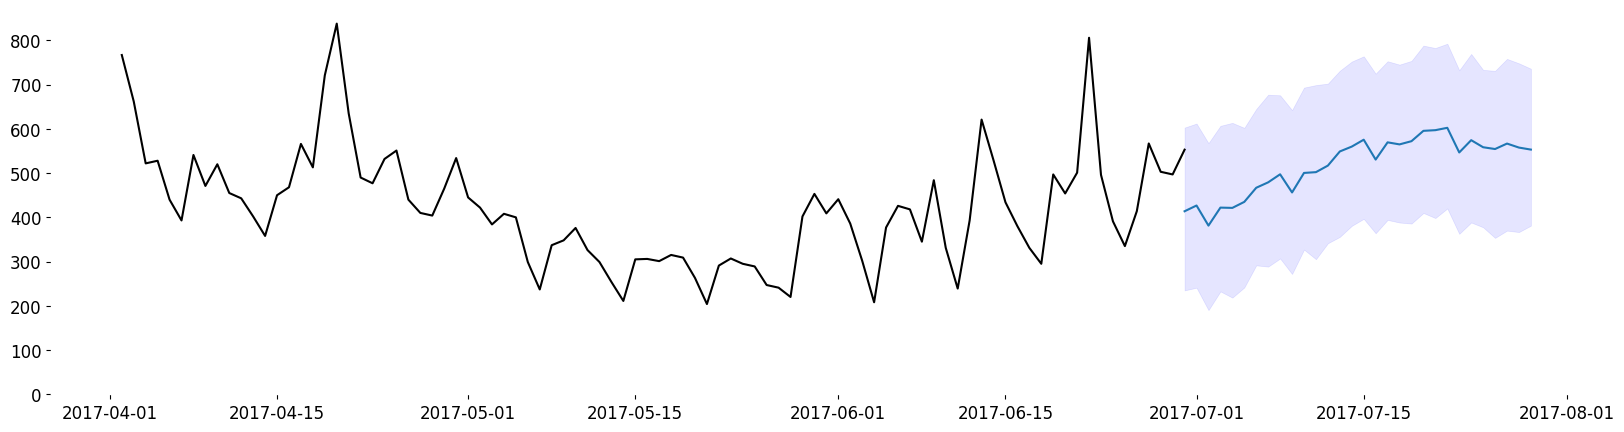

17:45:35 - cmdstanpy - INFO - Chain [1] start processing
17:45:35 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/python/3.10.8/lib/python3.10/site-packages/sktime/forecasting/base/_base.py:683: UserWarning: In 0.22.0, predict_interval return default column level 0 name will change for univariate probabilistic interval forecasts from 'Coverage' to variable name. The old behaviour can be retained by setting the legacy_interface argument to True, until 0.23.0 when the legacy_interface argument will be removed.
  warn(


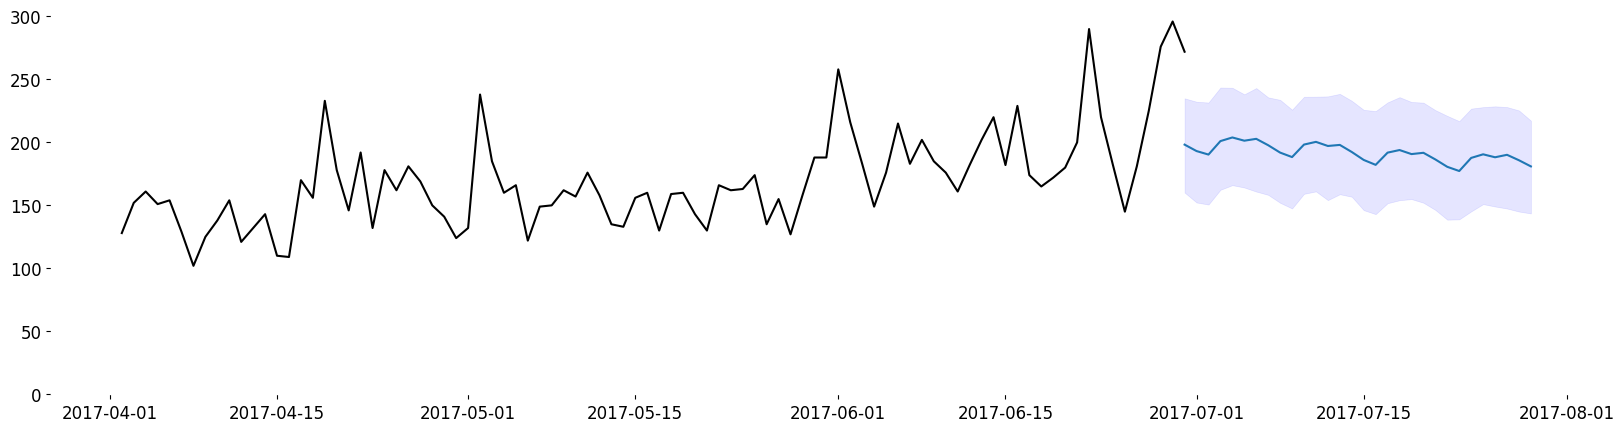

In [8]:
forecaster = Prophet(yearly_seasonality=True, weekly_seasonality=True)
sktime_forecast(dataset=traffic, horizon=30, forecaster=forecaster, validation=False)

In [9]:
forecaster = AutoARIMA(sp=1, suppress_warnings=True)
sktime_forecast(dataset=traffic, horizon=30, forecaster=forecaster, validation=False)

ModuleNotFoundError: AutoARIMA requires package 'pmdarima' to be present in the python environment, but 'pmdarima' was not found. 'pmdarima' is a soft dependency and not included in the base sktime installation. Please run: `pip install pmdarima` to install the pmdarima package. To install all soft dependencies, run: `pip install sktime[all_extras]`